In [10]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

Stock name: NKE
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


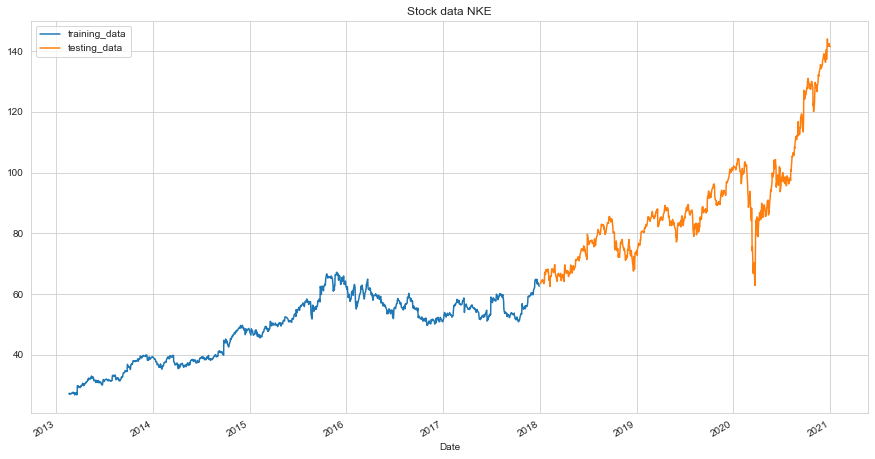

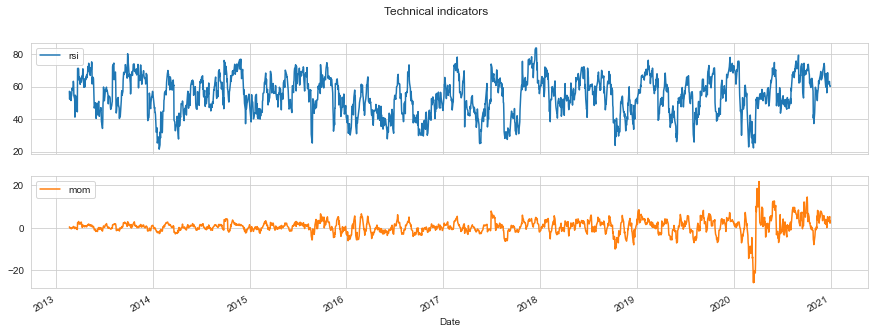

In [11]:
stock_name = 'nke'.upper()
industry = 'Consumer cyclical'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1460.43, duration: 0:00:00.357073
episode: 2/2000, episode end value: 1466.07, duration: 0:00:00.354081
episode: 3/2000, episode end value: 1466.38, duration: 0:00:00.337072
episode: 4/2000, episode end value: 1464.27, duration: 0:00:00.347079
episode: 5/2000, episode end value: 1462.24, duration: 0:00:00.415098
episode: 6/2000, episode end value: 1482.35, duration: 0:00:00.376081
episode: 7/2000, episode end value: 1467.42, duration: 0:00:00.358079
episode: 8/2000, episode end value: 1471.10, duration: 0:00:00.360083
episode: 9/2000, episode end value: 1462.77, duration: 0:00:00.465104
episode: 10/2000, episode end value: 1456.46, duration: 0:00:00.422093
episode: 11/2000, episode end value: 1471.03, duration: 0:00:00.459104
episode: 12/2000, episode end value: 1474.90, duration: 0:00:00.348079
episode: 13/2000, episode end value: 1473.17, duration: 0:00:00.403089
episode: 14/2000, episode end value: 1464.17, duration: 0:00:00.421096
episode: 15/200

episode: 117/2000, episode end value: 1465.19, duration: 0:00:00.411090
episode: 118/2000, episode end value: 1463.40, duration: 0:00:00.436096
episode: 119/2000, episode end value: 1463.48, duration: 0:00:00.452102
episode: 120/2000, episode end value: 1456.35, duration: 0:00:00.441103
episode: 121/2000, episode end value: 1452.81, duration: 0:00:00.396086
episode: 122/2000, episode end value: 1461.53, duration: 0:00:00.435104
episode: 123/2000, episode end value: 1453.14, duration: 0:00:00.409088
episode: 124/2000, episode end value: 1483.33, duration: 0:00:00.487106
episode: 125/2000, episode end value: 1464.25, duration: 0:00:00.489110
episode: 126/2000, episode end value: 1459.01, duration: 0:00:00.481108
episode: 127/2000, episode end value: 1454.99, duration: 0:00:00.390089
episode: 128/2000, episode end value: 1456.24, duration: 0:00:00.384087
episode: 129/2000, episode end value: 1458.71, duration: 0:00:00.474104
episode: 130/2000, episode end value: 1457.45, duration: 0:00:00

episode: 231/2000, episode end value: 1458.87, duration: 0:00:00.439097
episode: 232/2000, episode end value: 1463.86, duration: 0:00:00.406091
episode: 233/2000, episode end value: 1463.76, duration: 0:00:00.430098
episode: 234/2000, episode end value: 1457.36, duration: 0:00:00.397095
episode: 235/2000, episode end value: 1459.99, duration: 0:00:00.473103
episode: 236/2000, episode end value: 1468.28, duration: 0:00:00.435099
episode: 237/2000, episode end value: 1472.27, duration: 0:00:00.471103
episode: 238/2000, episode end value: 1472.52, duration: 0:00:00.466105
episode: 239/2000, episode end value: 1457.12, duration: 0:00:00.421098
episode: 240/2000, episode end value: 1451.83, duration: 0:00:00.448099
episode: 241/2000, episode end value: 1474.09, duration: 0:00:00.471109
episode: 242/2000, episode end value: 1466.30, duration: 0:00:00.451106
episode: 243/2000, episode end value: 1447.34, duration: 0:00:00.395090
episode: 244/2000, episode end value: 1460.33, duration: 0:00:00

episode: 345/2000, episode end value: 1470.17, duration: 0:00:00.405089
episode: 346/2000, episode end value: 1453.03, duration: 0:00:00.368087
episode: 347/2000, episode end value: 1454.67, duration: 0:00:00.429093
episode: 348/2000, episode end value: 1465.74, duration: 0:00:00.476108
episode: 349/2000, episode end value: 1457.93, duration: 0:00:00.397086
episode: 350/2000, episode end value: 1462.65, duration: 0:00:00.459104
episode: 351/2000, episode end value: 1460.47, duration: 0:00:00.463104
episode: 352/2000, episode end value: 1463.73, duration: 0:00:00.361082
episode: 353/2000, episode end value: 1454.39, duration: 0:00:00.384085
episode: 354/2000, episode end value: 1464.63, duration: 0:00:00.449103
episode: 355/2000, episode end value: 1468.11, duration: 0:00:00.427094
episode: 356/2000, episode end value: 1455.82, duration: 0:00:00.469106
episode: 357/2000, episode end value: 1464.61, duration: 0:00:00.418092
episode: 358/2000, episode end value: 1456.68, duration: 0:00:00

episode: 459/2000, episode end value: 1452.86, duration: 0:00:00.365082
episode: 460/2000, episode end value: 1463.25, duration: 0:00:00.432095
episode: 461/2000, episode end value: 1465.64, duration: 0:00:00.460103
episode: 462/2000, episode end value: 1458.73, duration: 0:00:00.403091
episode: 463/2000, episode end value: 1455.23, duration: 0:00:00.453101
episode: 464/2000, episode end value: 1452.77, duration: 0:00:00.387090
episode: 465/2000, episode end value: 1463.60, duration: 0:00:00.452101
episode: 466/2000, episode end value: 1465.46, duration: 0:00:00.407090
episode: 467/2000, episode end value: 1456.72, duration: 0:00:00.393093
episode: 468/2000, episode end value: 1467.48, duration: 0:00:00.459105
episode: 469/2000, episode end value: 1455.79, duration: 0:00:00.449098
episode: 470/2000, episode end value: 1461.11, duration: 0:00:00.467106
episode: 471/2000, episode end value: 1459.91, duration: 0:00:00.496110
episode: 472/2000, episode end value: 1463.41, duration: 0:00:00

episode: 573/2000, episode end value: 1476.97, duration: 0:00:00.559128
episode: 574/2000, episode end value: 1465.44, duration: 0:00:00.561124
episode: 575/2000, episode end value: 1468.97, duration: 0:00:00.478106
episode: 576/2000, episode end value: 1467.38, duration: 0:00:00.520122
episode: 577/2000, episode end value: 1466.81, duration: 0:00:00.398087
episode: 578/2000, episode end value: 1464.76, duration: 0:00:00.420093
episode: 579/2000, episode end value: 1461.65, duration: 0:00:00.468106
episode: 580/2000, episode end value: 1465.63, duration: 0:00:00.405090
episode: 581/2000, episode end value: 1463.38, duration: 0:00:00.448100
episode: 582/2000, episode end value: 1456.61, duration: 0:00:00.508113
episode: 583/2000, episode end value: 1463.40, duration: 0:00:00.500112
episode: 584/2000, episode end value: 1467.19, duration: 0:00:00.416093
episode: 585/2000, episode end value: 1448.90, duration: 0:00:00.368083
episode: 586/2000, episode end value: 1460.68, duration: 0:00:00

episode: 687/2000, episode end value: 1459.77, duration: 0:00:00.405094
episode: 688/2000, episode end value: 1462.36, duration: 0:00:00.415097
episode: 689/2000, episode end value: 1465.52, duration: 0:00:00.414098
episode: 690/2000, episode end value: 1462.03, duration: 0:00:00.438100
episode: 691/2000, episode end value: 1456.15, duration: 0:00:00.440098
episode: 692/2000, episode end value: 1468.61, duration: 0:00:00.487107
episode: 693/2000, episode end value: 1445.88, duration: 0:00:00.416096
episode: 694/2000, episode end value: 1455.31, duration: 0:00:00.447098
episode: 695/2000, episode end value: 1455.62, duration: 0:00:00.372085
episode: 696/2000, episode end value: 1463.71, duration: 0:00:00.398090
episode: 697/2000, episode end value: 1463.94, duration: 0:00:00.427094
episode: 698/2000, episode end value: 1453.09, duration: 0:00:00.394089
episode: 699/2000, episode end value: 1460.30, duration: 0:00:00.461102
episode: 700/2000, episode end value: 1455.20, duration: 0:00:00

episode: 801/2000, episode end value: 1468.17, duration: 0:00:00.397088
episode: 802/2000, episode end value: 1457.31, duration: 0:00:00.409091
episode: 803/2000, episode end value: 1464.34, duration: 0:00:00.442103
episode: 804/2000, episode end value: 1457.71, duration: 0:00:00.517112
episode: 805/2000, episode end value: 1455.79, duration: 0:00:00.452100
episode: 806/2000, episode end value: 1477.89, duration: 0:00:00.410095
episode: 807/2000, episode end value: 1481.09, duration: 0:00:00.518113
episode: 808/2000, episode end value: 1480.68, duration: 0:00:00.540117
episode: 809/2000, episode end value: 1481.11, duration: 0:00:00.511117
episode: 810/2000, episode end value: 1480.51, duration: 0:00:00.492107
episode: 811/2000, episode end value: 1481.53, duration: 0:00:00.459105
episode: 812/2000, episode end value: 1467.68, duration: 0:00:00.435099
episode: 813/2000, episode end value: 1454.20, duration: 0:00:00.404090
episode: 814/2000, episode end value: 1462.66, duration: 0:00:00

episode: 915/2000, episode end value: 1465.69, duration: 0:00:00.455097
episode: 916/2000, episode end value: 1466.34, duration: 0:00:00.447100
episode: 917/2000, episode end value: 1452.48, duration: 0:00:00.394086
episode: 918/2000, episode end value: 1467.96, duration: 0:00:00.408093
episode: 919/2000, episode end value: 1464.42, duration: 0:00:00.430092
episode: 920/2000, episode end value: 1464.96, duration: 0:00:00.421093
episode: 921/2000, episode end value: 1451.49, duration: 0:00:00.418096
episode: 922/2000, episode end value: 1460.96, duration: 0:00:00.426097
episode: 923/2000, episode end value: 1464.23, duration: 0:00:00.395087
episode: 924/2000, episode end value: 1453.25, duration: 0:00:00.438098
episode: 925/2000, episode end value: 1461.87, duration: 0:00:00.428097
episode: 926/2000, episode end value: 1452.09, duration: 0:00:00.365082
episode: 927/2000, episode end value: 1460.85, duration: 0:00:00.466106
episode: 928/2000, episode end value: 1450.03, duration: 0:00:00

episode: 1029/2000, episode end value: 1457.79, duration: 0:00:00.368078
episode: 1030/2000, episode end value: 1459.55, duration: 0:00:00.381083
episode: 1031/2000, episode end value: 1478.35, duration: 0:00:00.516117
episode: 1032/2000, episode end value: 1467.74, duration: 0:00:00.439095
episode: 1033/2000, episode end value: 1456.34, duration: 0:00:00.404095
episode: 1034/2000, episode end value: 1449.02, duration: 0:00:00.388086
episode: 1035/2000, episode end value: 1462.94, duration: 0:00:00.456102
episode: 1036/2000, episode end value: 1459.53, duration: 0:00:00.495108
episode: 1037/2000, episode end value: 1469.80, duration: 0:00:00.418096
episode: 1038/2000, episode end value: 1459.38, duration: 0:00:00.389091
episode: 1039/2000, episode end value: 1465.09, duration: 0:00:00.436098
episode: 1040/2000, episode end value: 1460.85, duration: 0:00:00.376082
episode: 1041/2000, episode end value: 1454.81, duration: 0:00:00.404091
episode: 1042/2000, episode end value: 1469.44, dur

episode: 1142/2000, episode end value: 1465.54, duration: 0:00:00.504114
episode: 1143/2000, episode end value: 1452.60, duration: 0:00:00.376083
episode: 1144/2000, episode end value: 1464.64, duration: 0:00:00.436095
episode: 1145/2000, episode end value: 1450.83, duration: 0:00:00.357082
episode: 1146/2000, episode end value: 1470.55, duration: 0:00:00.444097
episode: 1147/2000, episode end value: 1463.87, duration: 0:00:00.370085
episode: 1148/2000, episode end value: 1452.22, duration: 0:00:00.428096
episode: 1149/2000, episode end value: 1467.03, duration: 0:00:00.460109
episode: 1150/2000, episode end value: 1461.02, duration: 0:00:00.425092
episode: 1151/2000, episode end value: 1462.63, duration: 0:00:00.440101
episode: 1152/2000, episode end value: 1462.23, duration: 0:00:00.389092
episode: 1153/2000, episode end value: 1466.12, duration: 0:00:00.448098
episode: 1154/2000, episode end value: 1470.35, duration: 0:00:00.499109
episode: 1155/2000, episode end value: 1475.64, dur

episode: 1255/2000, episode end value: 1461.93, duration: 0:00:00.365082
episode: 1256/2000, episode end value: 1462.55, duration: 0:00:00.481109
episode: 1257/2000, episode end value: 1458.34, duration: 0:00:00.382086
episode: 1258/2000, episode end value: 1461.15, duration: 0:00:00.372085
episode: 1259/2000, episode end value: 1463.97, duration: 0:00:00.396089
episode: 1260/2000, episode end value: 1455.64, duration: 0:00:00.410091
episode: 1261/2000, episode end value: 1466.71, duration: 0:00:00.412094
episode: 1262/2000, episode end value: 1464.53, duration: 0:00:00.428096
episode: 1263/2000, episode end value: 1463.33, duration: 0:00:00.422099
episode: 1264/2000, episode end value: 1463.47, duration: 0:00:00.449096
episode: 1265/2000, episode end value: 1452.14, duration: 0:00:00.380088
episode: 1266/2000, episode end value: 1467.56, duration: 0:00:00.420095
episode: 1267/2000, episode end value: 1458.09, duration: 0:00:00.401091
episode: 1268/2000, episode end value: 1478.05, dur

episode: 1368/2000, episode end value: 1465.93, duration: 0:00:00.400091
episode: 1369/2000, episode end value: 1464.62, duration: 0:00:00.406089
episode: 1370/2000, episode end value: 1465.54, duration: 0:00:00.409092
episode: 1371/2000, episode end value: 1461.59, duration: 0:00:00.459101
episode: 1372/2000, episode end value: 1476.48, duration: 0:00:00.470106
episode: 1373/2000, episode end value: 1470.54, duration: 0:00:00.459098
episode: 1374/2000, episode end value: 1466.85, duration: 0:00:00.435096
episode: 1375/2000, episode end value: 1463.32, duration: 0:00:00.408096
episode: 1376/2000, episode end value: 1458.62, duration: 0:00:00.413092
episode: 1377/2000, episode end value: 1456.01, duration: 0:00:00.397093
episode: 1378/2000, episode end value: 1463.54, duration: 0:00:00.377083
episode: 1379/2000, episode end value: 1459.91, duration: 0:00:00.347075
episode: 1380/2000, episode end value: 1453.59, duration: 0:00:00.374088
episode: 1381/2000, episode end value: 1459.59, dur

episode: 1481/2000, episode end value: 1466.14, duration: 0:00:00.406093
episode: 1482/2000, episode end value: 1447.00, duration: 0:00:00.386087
episode: 1483/2000, episode end value: 1453.25, duration: 0:00:00.361080
episode: 1484/2000, episode end value: 1464.58, duration: 0:00:00.369078
episode: 1485/2000, episode end value: 1459.19, duration: 0:00:00.347081
episode: 1486/2000, episode end value: 1457.23, duration: 0:00:00.443098
episode: 1487/2000, episode end value: 1466.21, duration: 0:00:00.343077
episode: 1488/2000, episode end value: 1461.71, duration: 0:00:00.343077
episode: 1489/2000, episode end value: 1463.21, duration: 0:00:00.370084
episode: 1490/2000, episode end value: 1454.89, duration: 0:00:00.390091
episode: 1491/2000, episode end value: 1472.04, duration: 0:00:00.402084
episode: 1492/2000, episode end value: 1454.07, duration: 0:00:00.335074
episode: 1493/2000, episode end value: 1460.16, duration: 0:00:00.366082
episode: 1494/2000, episode end value: 1462.54, dur

episode: 1594/2000, episode end value: 1470.09, duration: 0:00:00.358085
episode: 1595/2000, episode end value: 1457.18, duration: 0:00:00.358079
episode: 1596/2000, episode end value: 1470.14, duration: 0:00:00.378084
episode: 1597/2000, episode end value: 1463.41, duration: 0:00:00.447100
episode: 1598/2000, episode end value: 1460.77, duration: 0:00:00.418093
episode: 1599/2000, episode end value: 1459.61, duration: 0:00:00.479107
episode: 1600/2000, episode end value: 1457.51, duration: 0:00:00.397091
episode: 1601/2000, episode end value: 1465.78, duration: 0:00:00.346077
episode: 1602/2000, episode end value: 1468.92, duration: 0:00:00.356080
episode: 1603/2000, episode end value: 1460.26, duration: 0:00:00.393088
episode: 1604/2000, episode end value: 1458.20, duration: 0:00:00.353079
episode: 1605/2000, episode end value: 1462.11, duration: 0:00:00.369083
episode: 1606/2000, episode end value: 1455.83, duration: 0:00:00.372083
episode: 1607/2000, episode end value: 1457.48, dur

episode: 1707/2000, episode end value: 1454.65, duration: 0:00:00.331071
episode: 1708/2000, episode end value: 1460.13, duration: 0:00:00.335072
episode: 1709/2000, episode end value: 1454.14, duration: 0:00:00.291064
episode: 1710/2000, episode end value: 1453.15, duration: 0:00:00.310070
episode: 1711/2000, episode end value: 1461.63, duration: 0:00:00.362085
episode: 1712/2000, episode end value: 1457.19, duration: 0:00:00.346079
episode: 1713/2000, episode end value: 1468.09, duration: 0:00:00.323069
episode: 1714/2000, episode end value: 1463.82, duration: 0:00:00.379085
episode: 1715/2000, episode end value: 1463.50, duration: 0:00:00.314072
episode: 1716/2000, episode end value: 1452.86, duration: 0:00:00.349072
episode: 1717/2000, episode end value: 1472.25, duration: 0:00:00.360082
episode: 1718/2000, episode end value: 1459.18, duration: 0:00:00.342076
episode: 1719/2000, episode end value: 1458.64, duration: 0:00:00.315075
episode: 1720/2000, episode end value: 1462.25, dur

episode: 1820/2000, episode end value: 1477.02, duration: 0:00:00.247053
episode: 1821/2000, episode end value: 1472.62, duration: 0:00:00.235052
episode: 1822/2000, episode end value: 1464.45, duration: 0:00:00.240053
episode: 1823/2000, episode end value: 1450.26, duration: 0:00:00.235052
episode: 1824/2000, episode end value: 1459.90, duration: 0:00:00.226049
episode: 1825/2000, episode end value: 1464.40, duration: 0:00:00.219051
episode: 1826/2000, episode end value: 1468.01, duration: 0:00:00.250054
episode: 1827/2000, episode end value: 1462.71, duration: 0:00:00.249054
episode: 1828/2000, episode end value: 1465.07, duration: 0:00:00.231052
episode: 1829/2000, episode end value: 1460.36, duration: 0:00:00.236052
episode: 1830/2000, episode end value: 1462.83, duration: 0:00:00.242054
episode: 1831/2000, episode end value: 1447.43, duration: 0:00:00.225053
episode: 1832/2000, episode end value: 1465.24, duration: 0:00:00.226052
episode: 1833/2000, episode end value: 1458.96, dur

episode: 1933/2000, episode end value: 1465.10, duration: 0:00:00.209046
episode: 1934/2000, episode end value: 1467.12, duration: 0:00:00.211048
episode: 1935/2000, episode end value: 1477.53, duration: 0:00:00.225049
episode: 1936/2000, episode end value: 1469.06, duration: 0:00:00.221050
episode: 1937/2000, episode end value: 1460.53, duration: 0:00:00.213049
episode: 1938/2000, episode end value: 1467.67, duration: 0:00:00.214049
episode: 1939/2000, episode end value: 1458.95, duration: 0:00:00.217048
episode: 1940/2000, episode end value: 1482.29, duration: 0:00:00.228053
episode: 1941/2000, episode end value: 1467.00, duration: 0:00:00.217047
episode: 1942/2000, episode end value: 1450.75, duration: 0:00:00.209044
episode: 1943/2000, episode end value: 1460.14, duration: 0:00:00.205065
episode: 1944/2000, episode end value: 1453.54, duration: 0:00:00.207046
episode: 1945/2000, episode end value: 1466.56, duration: 0:00:00.214042
episode: 1946/2000, episode end value: 1491.06, dur

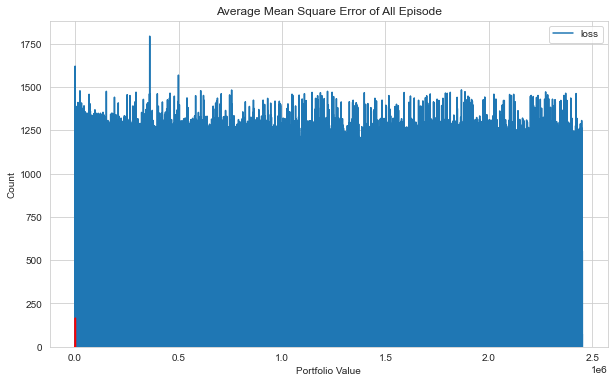

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

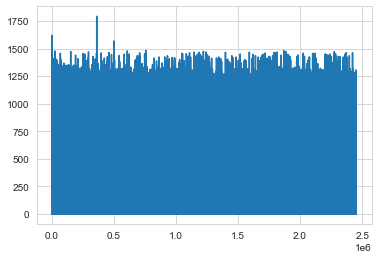

In [5]:
plt.plot(agent.model.losses)

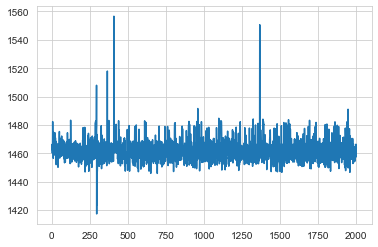

In [6]:
plt.plot(portfolio_value)

episode end value: 1423.89, duration: 0:00:00.063032
Sell: 94 times, Buy: 84 times


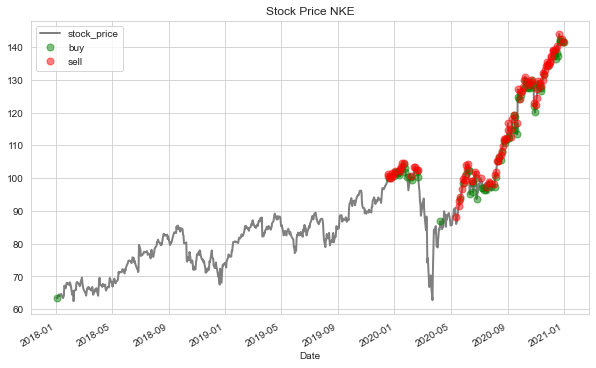

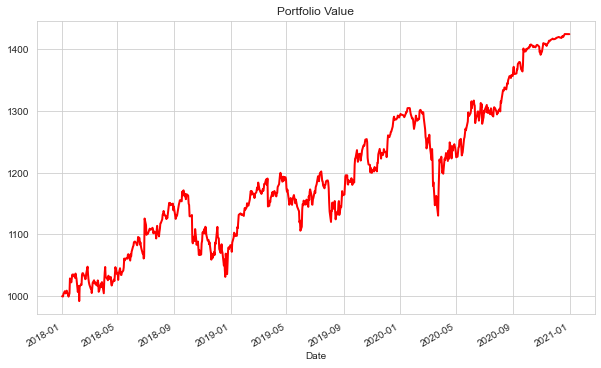

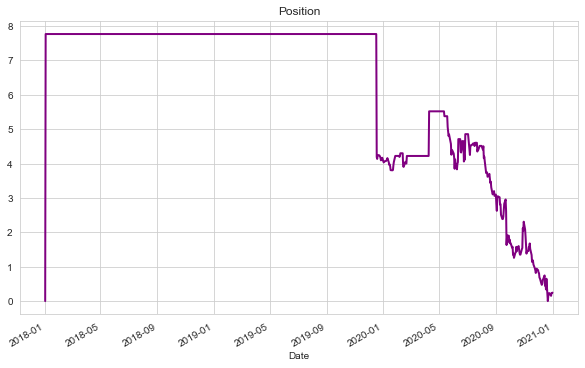

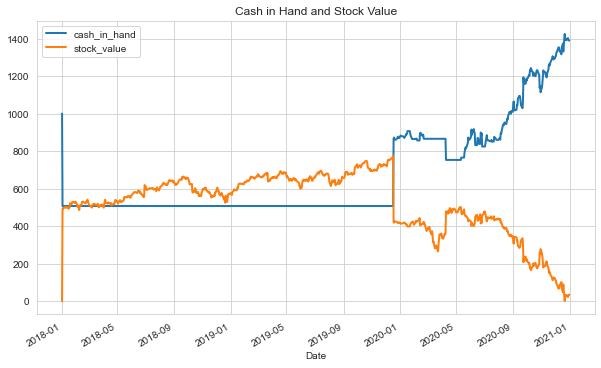

In [12]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [13]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: NKE
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: 12.50 %
Volatility: 0.1303
shape ratio: 0.8754
Maximun drawdown: -13.34 %
Calmar ratio: 0.9374
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): 30.61 %
Volatility (benchmark): 0.3168
shape ratio: 0.9317
Maximun drawdown: -39.95 %
Calmar ratio (benchmark): 0.7663


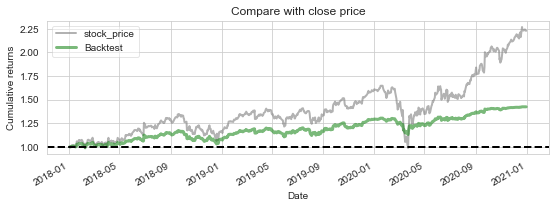

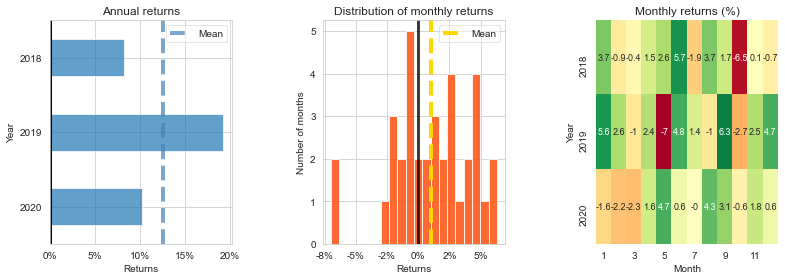

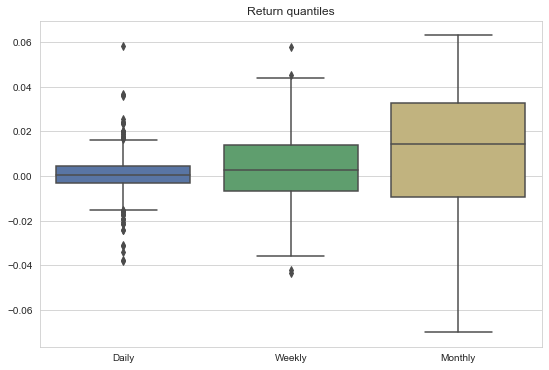

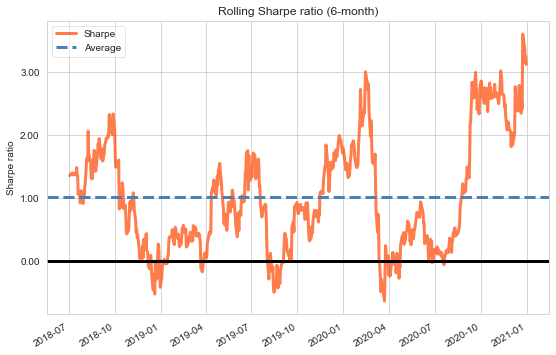

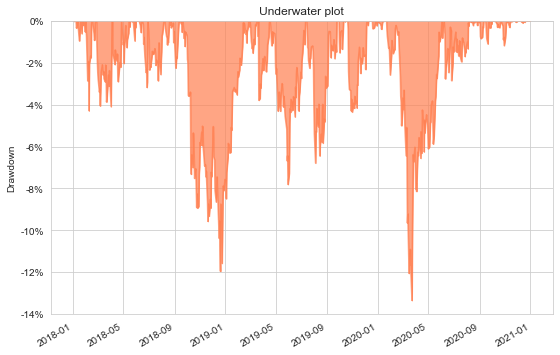

In [14]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')